# 3.0 Scan conversion of multidimensional imaging signals

# Dynamic range compression in imaging signals

Original Image Memory Size: 0.07 MB
Transformed Image Memory Size: 0.02 MB


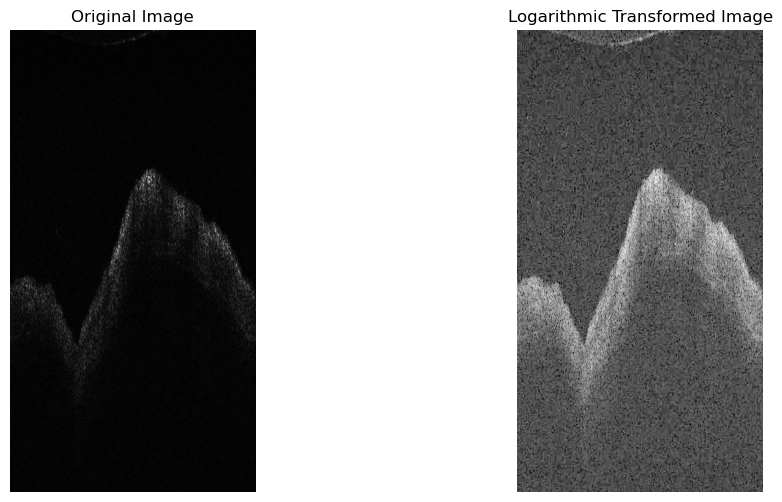

In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# Function to perform logarithmic transformation on the input image
def logarithmic_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_transformed_image = c * np.log(1 + image)
    log_transformed_image = np.uint8(log_transformed_image)
    return log_transformed_image

# Load the input image (grayscale)
input_image_path = r"C:\Users\User\Downloads\polar.jpg"
original_image = imageio.imread(input_image_path, as_gray=True)

# Perform logarithmic transformation
log_transformed_image = logarithmic_transform(original_image)

# Plot the original and transformed images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Logarithmic Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Logarithmic Transformed Image')
plt.axis('off')

# Display memory size
original_memory_size = original_image.nbytes / (4096 * 4096)  # in MB
transformed_memory_size = log_transformed_image.nbytes / (4096 * 4096)  # in MB
print(f"Original Image Memory Size: {original_memory_size:.2f} MB")
print(f"Transformed Image Memory Size: {transformed_memory_size:.2f} MB")

plt.show()


# Polar to Cartesian coordinate

(752, 400)


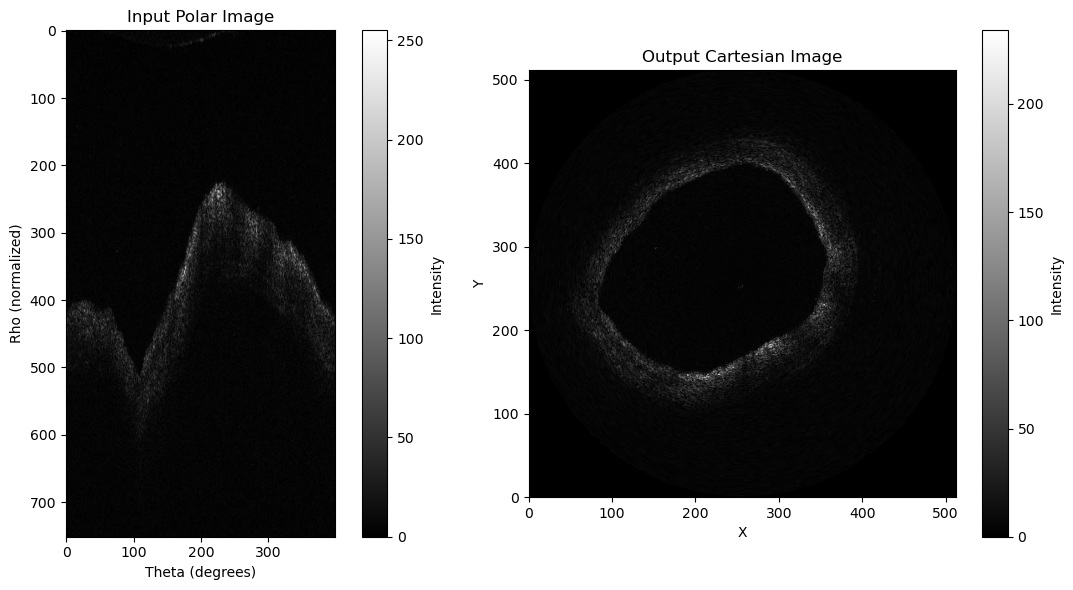

Execution Time: 0.0433 seconds
Space Complexity: 2.0000 MB


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

def polar_to_cartesian_image(polar_image, num_rows, num_cols):
    # Find the size of the polar domain image
    sz = polar_image.shape
    
    # Create a lookup matrix of x indices for Cartesian coordinates
    x_idx = np.tile(np.arange(1, num_rows + 1), (num_cols, 1)).T
    
    # Create a lookup matrix of y indices for Cartesian coordinates
    y_idx = np.tile(np.arange(1, num_cols + 1), (num_rows, 1))
    
    # Calculate the center coordinates of the Cartesian image
    center_x = np.ceil(num_rows / 2)
    center_y = np.ceil(num_cols / 2)
    
    # Calculate the radial indices based on distance from the center
    rad_idx = np.ceil(np.sqrt((x_idx - center_x)**2 + (y_idx - center_y)**2) * (sz[0] - 1) / (num_rows / 2)) + 1
    
    # Calculate the angular indices
    theta_idx = np.floor((np.arctan2(y_idx - center_y, x_idx - center_x) + np.pi) * (sz[1] - 1) / (2 * np.pi)) + 1
    
    # Create a padded array to accommodate the polar image
    polar_image_padded = np.zeros((int(np.max(rad_idx)), sz[1]))
    
    # Copy the polar image data to the top rows of the padded array
    polar_image_padded[:sz[0], :] = polar_image
    
    # Convert radial and angular indices to linear indices
    linear_indices = np.ravel_multi_index((rad_idx.astype(int) - 1, theta_idx.astype(int) - 1), polar_image_padded.shape)
    
    # Retrieve and reshape the values from the padded array to form the Cartesian image
    cartesian_image = polar_image_padded.ravel()[linear_indices].reshape(num_rows, num_cols)
    
    return cartesian_image


# Example usage:
Img = Image.open(r"C:\Users\User\Downloads\polar.jpg")
Imgarr = np.asarray(Img)
shape = np.shape(Imgarr)
print(shape)
polar_image = Imgarr
num_rows = 512
num_cols = 512

# Start timing the code execution
start_time = time.time()

# Convert polar image to Cartesian image
cartesian_image = polar_to_cartesian_image(polar_image, num_rows, num_cols)

# End timing the code execution
end_time = time.time()
execution_time = end_time - start_time

# Calculate space complexity
cartesian_image_size = cartesian_image.nbytes
# total_space_complexity = rho_values_size + theta_degrees_size + cartesian_image_size
total_space_complexity = cartesian_image_size

# Display both the input polar image and the output Cartesian image side by side
plt.figure(figsize=(12, 6))

# Display the input polar image on the left
plt.subplot(1, 2, 1)
plt.imshow(polar_image, cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (normalized)')
plt.title('Input Polar Image')

# Display the output Cartesian image on the right
plt.subplot(1, 2, 2)
plt.imshow(cartesian_image, cmap='gray', extent=[0, num_cols, 0, num_rows])
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output Cartesian Image')

plt.tight_layout()
plt.show()

# Print execution time and space complexity
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Space Complexity: {total_space_complexity / (1024 * 1024):.4f} MB")  # Convert to MB for readability

# Cartesian to Polar coordinate

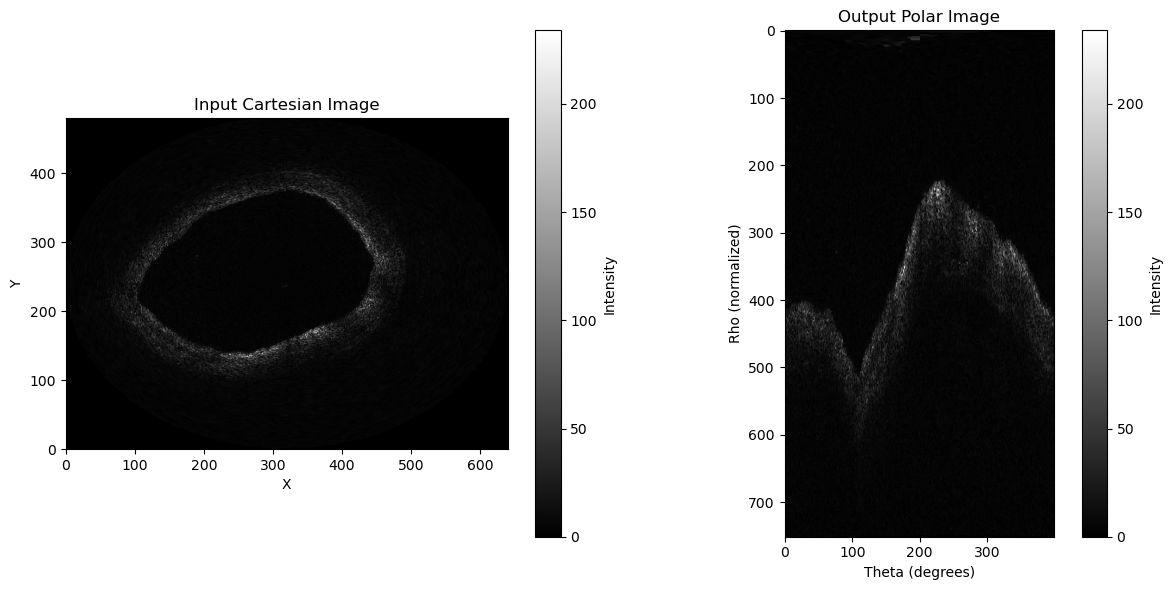

Execution Time: 0.0671 seconds
Space Complexity: 2.2949 MB


In [3]:
def cartesian_to_polar_image(cartesian_image, num_radius, num_theta):
    # Find the size of the Cartesian image
    sz = cartesian_image.shape
    
    # Create a lookup matrix for radius values
    rad_idx = np.tile(np.arange(1, num_radius + 1), (num_theta, 1)).T
    
    # Create a lookup matrix for theta values
    theta_idx = np.tile(np.arange(1, num_theta + 1), (num_radius, 1))
    
    # Calculate x and y indices in Cartesian coordinates
    x_idx = np.ceil(((rad_idx - 1) * (sz[0] / 2) / (num_radius - 1) *
                     np.cos(((theta_idx - 1) * 2 * np.pi / (num_theta - 1)) - np.pi)) + np.ceil(sz[0] / 2)).astype(int)
    
    y_idx = np.ceil(((rad_idx - 1) * (sz[1] / 2) / (num_radius - 1) *
                     np.sin(((theta_idx - 1) * 2 * np.pi / (num_theta - 1)) - np.pi)) + np.ceil(sz[1] / 2)).astype(int)
    
    # Remove any '0' values due to quantization errors
    x_idx = x_idx + (x_idx == 0)
    y_idx = y_idx + (y_idx == 0)
    
    # Convert x and y indices to linear indices
    polar_indices = np.ravel_multi_index((x_idx.ravel() - 1, y_idx.ravel() - 1), sz)
    
    # Retrieve and reshape the values from the Cartesian image to form the polar image
    polar_image = cartesian_image.ravel()[polar_indices].reshape(num_radius, num_theta)
    
    return polar_image


# Example usage:
# Create a sample Cartesian image (replace this with your actual Cartesian image data)
# cartesian_image = np.random.rand(480, 640)
num_radius = 752
num_theta = 400

# Start timing the code execution
start_time = time.time()

# Convert Cartesian image to polar image
polar_image1 = cartesian_to_polar_image(cartesian_image, num_radius, num_theta)

# End timing the code execution
end_time = time.time()
execution_time = end_time - start_time

# Calculate space complexity

polar_image_size1 = polar_image1.nbytes
# total_space_complexity = rho_values_size + theta_degrees_size + cartesian_image_size
total_space_complexity = polar_image_size1


# Display both the input Cartesian image and the output polar image side by side
plt.figure(figsize=(12, 6))

# Display the input Cartesian image on the left
plt.subplot(1, 2, 1)
plt.imshow(cartesian_image, cmap='gray', extent=[0, 640, 0, 480])
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Cartesian Image')

# Display the output polar image on the right
plt.subplot(1, 2, 2)
plt.imshow(polar_image1, cmap='gray',)
plt.colorbar(label='Intensity')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (normalized)')
plt.title('Output Polar Image')

plt.tight_layout()
plt.show()

# Print execution time and space complexity
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Space Complexity: {total_space_complexity / (1024 * 1024):.4f} MB")  # Convert to MB for readability

# Error Calculation for polar image

In [ ]:
sz1=polar_image.shape
sz2=polar_image1.shape

In [ ]:
sz1

In [ ]:
sz2

In [ ]:
diff = polar_image1-polar_image

In [ ]:
plt.imshow(diff, cmap='gray',)
plt.title('Difference of images')
plt.show()

In [ ]:
MSE=((diff**2/((sz1[0]*sz2[1]))))
MSE

In [ ]:
plt.imshow(MSE,cmap ='gray',)
plt.title('Mean square error of images')

# Cartesian to polar conversion

(512, 512)


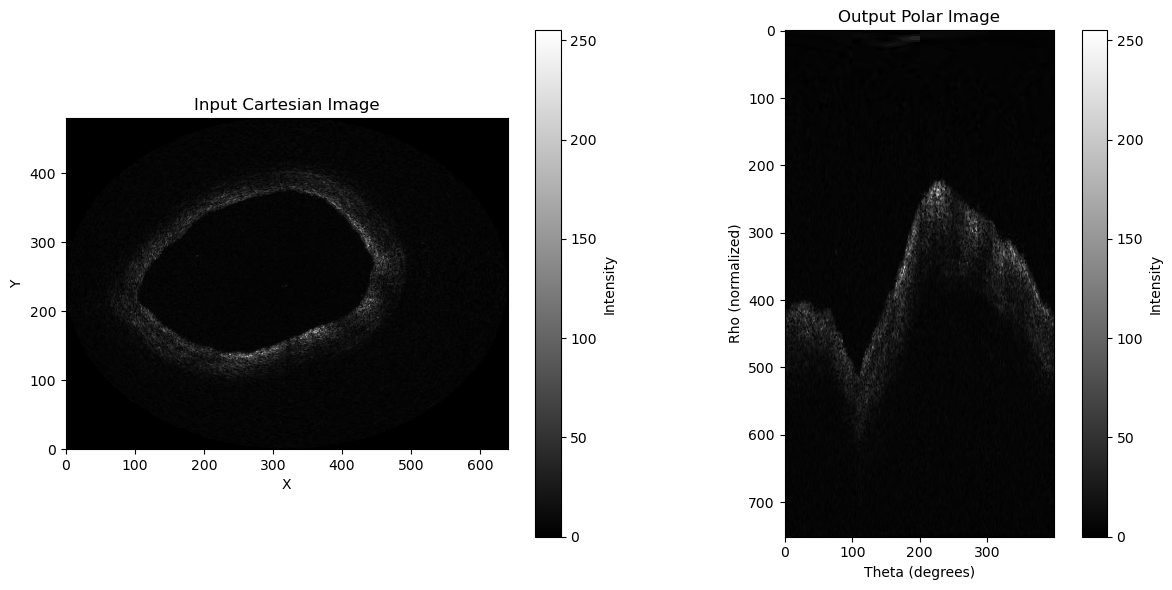

Execution Time: 0.0396 seconds
Space Complexity: 0.2869 MB


In [5]:
def cartesian_to_polar_image(cartesian_image, num_radius, num_theta):
    # Find the size of the Cartesian image
    sz = cartesian_image.shape
    
    # Create a lookup matrix for radius values
    rad_idx = np.tile(np.arange(1, num_radius + 1), (num_theta, 1)).T
    
    # Create a lookup matrix for theta values
    theta_idx = np.tile(np.arange(1, num_theta + 1), (num_radius, 1))
    
    # Calculate x and y indices in Cartesian coordinates
    x_idx = np.ceil(((rad_idx - 1) * (sz[0] / 2) / (num_radius - 1) *
                     np.cos(((theta_idx - 1) * 2 * np.pi / (num_theta - 1)) - np.pi)) + np.ceil(sz[0] / 2)).astype(int)
    
    y_idx = np.ceil(((rad_idx - 1) * (sz[1] / 2) / (num_radius - 1) *
                     np.sin(((theta_idx - 1) * 2 * np.pi / (num_theta - 1)) - np.pi)) + np.ceil(sz[1] / 2)).astype(int)
    
    # Remove any '0' values due to quantization errors
    x_idx = x_idx + (x_idx == 0)
    y_idx = y_idx + (y_idx == 0)
    
    # Convert x and y indices to linear indices
    polar_indices = np.ravel_multi_index((x_idx.ravel() - 1, y_idx.ravel() - 1), sz)
    
    # Retrieve and reshape the values from the Cartesian image to form the polar image
    polar_image = cartesian_image.ravel()[polar_indices].reshape(num_radius, num_theta)
    
    return polar_image


# Example usage:
Img = Image.open(r"C:\Users\User\Downloads\cart.jpg")
Imgarr = np.asarray(Img)
shape = np.shape(Imgarr)
print(shape)
cartesian_img = Imgarr
num_radius = 752
num_theta = 400

# Start timing the code execution
start_time = time.time()

# Convert Cartesian image to polar image
polar_image1 = cartesian_to_polar_image(cartesian_img, num_radius, num_theta)

# End timing the code execution
end_time = time.time()
execution_time = end_time - start_time

# Calculate space complexity

polar_image_size1 = polar_image1.nbytes
# total_space_complexity = rho_values_size + theta_degrees_size + cartesian_image_size
total_space_complexity = polar_image_size1


# Display both the input Cartesian image and the output polar image side by side
plt.figure(figsize=(12, 6))

# Display the input Cartesian image on the left
plt.subplot(1, 2, 1)
plt.imshow(cartesian_img, cmap='gray', extent=[0, 640, 0, 480])
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Cartesian Image')

# Display the output polar image on the right
plt.subplot(1, 2, 2)
plt.imshow(polar_image1, cmap='gray',)
plt.colorbar(label='Intensity')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (normalized)')
plt.title('Output Polar Image')

plt.tight_layout()
plt.show()

# Print execution time and space complexity
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Space Complexity: {total_space_complexity / (1024 * 1024):.4f} MB")  # Convert to MB for readability

# Polar to cartesian conversion

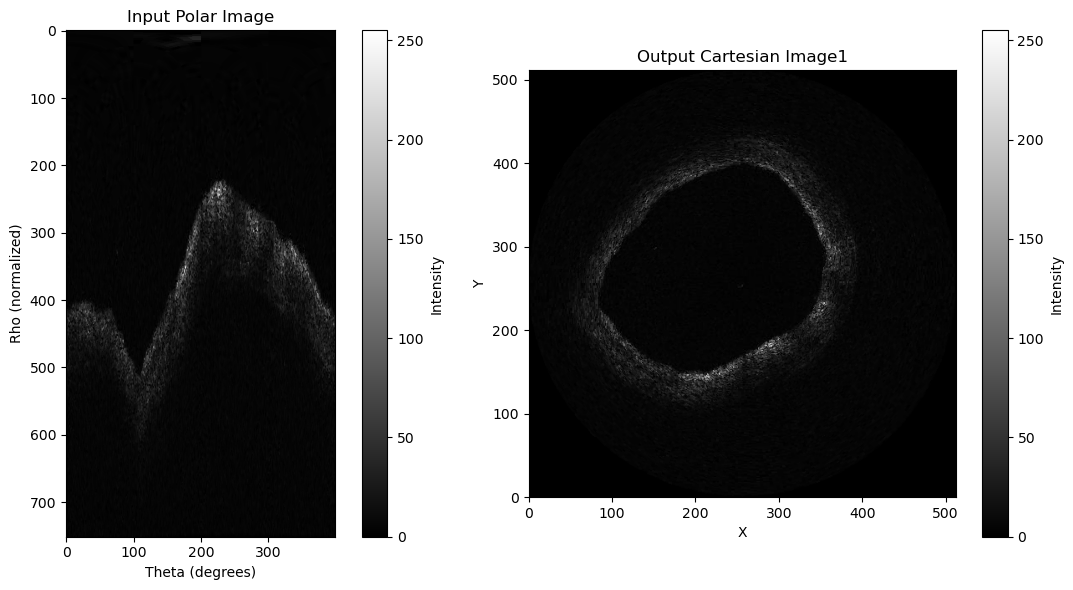

Execution Time: 0.0541 seconds
Space Complexity: 2.0000 MB


In [6]:
def polar_to_cartesian_image(polar_image, num_rows, num_cols):
    # Find the size of the polar domain image
    sz = polar_image.shape
    
    # Create a lookup matrix of x indices for Cartesian coordinates
    x_idx = np.tile(np.arange(1, num_rows + 1), (num_cols, 1)).T
    
    # Create a lookup matrix of y indices for Cartesian coordinates
    y_idx = np.tile(np.arange(1, num_cols + 1), (num_rows, 1))
    
    # Calculate the center coordinates of the Cartesian image
    center_x = np.ceil(num_rows / 2)
    center_y = np.ceil(num_cols / 2)
    
    # Calculate the radial indices based on distance from the center
    rad_idx = np.ceil(np.sqrt((x_idx - center_x)**2 + (y_idx - center_y)**2) * (sz[0] - 1) / (num_rows / 2)) + 1
    
    # Calculate the angular indices
    theta_idx = np.floor((np.arctan2(y_idx - center_y, x_idx - center_x) + np.pi) * (sz[1] - 1) / (2 * np.pi)) + 1
    
    # Create a padded array to accommodate the polar image
    polar_image_padded = np.zeros((int(np.max(rad_idx)), sz[1]))
    
    # Copy the polar image data to the top rows of the padded array
    polar_image_padded[:sz[0], :] = polar_image
    
    # Convert radial and angular indices to linear indices
    linear_indices = np.ravel_multi_index((rad_idx.astype(int) - 1, theta_idx.astype(int) - 1), polar_image_padded.shape)
    
    # Retrieve and reshape the values from the padded array to form the Cartesian image
    cartesian_image = polar_image_padded.ravel()[linear_indices].reshape(num_rows, num_cols)
    
    return cartesian_image


# # Example usage:
# Img = Image.open(r"C:\Users\User\Downloads\polar.jpg")
# Imgarr = np.asarray(Img)
# shape = np.shape(Imgarr)
# print(shape)
polar_image = polar_image1
num_rows = 512
num_cols = 512

# Start timing the code execution
start_time = time.time()

# Convert polar image to Cartesian image
cartesian_img1 = polar_to_cartesian_image(polar_image, num_rows, num_cols)

# End timing the code execution
end_time = time.time()
execution_time = end_time - start_time

# Calculate space complexity
cartesian_img1_size1 = cartesian_img1.nbytes
# total_space_complexity = rho_values_size + theta_degrees_size + cartesian_image_size
total_space_complexity = cartesian_img1_size1

# Display both the input polar image and the output Cartesian image side by side
plt.figure(figsize=(12, 6))

# Display the input polar image on the left
plt.subplot(1, 2, 1)
plt.imshow(polar_image, cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (normalized)')
plt.title('Input Polar Image')

# Display the output Cartesian image on the right
plt.subplot(1, 2, 2)
plt.imshow(cartesian_img1, cmap='gray', extent=[0, num_cols, 0, num_rows])
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output Cartesian Image1')

plt.tight_layout()
plt.show()

# Print execution time and space complexity
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Space Complexity: {total_space_complexity / (1024 * 1024):.4f} MB")  # Convert to MB for readability

# Error calculation for cartesian image

In [11]:
sz1=cartesian_img.shape
sz2=cartesian_img1.shape

In [12]:
sz1

(512, 512)

In [13]:
sz2

(512, 512)

In [8]:
dif = cartesian_img1-cartesian_img


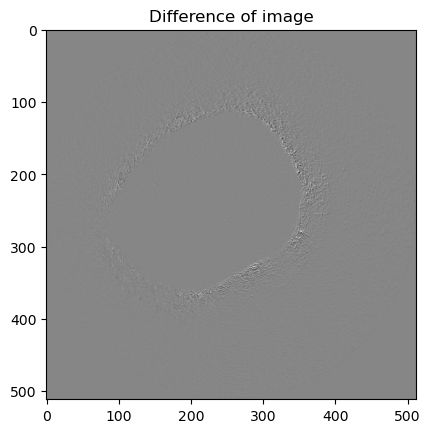

In [9]:
plt.imshow(dif, cmap='gray',)
plt.title('Difference of image')
plt.show()

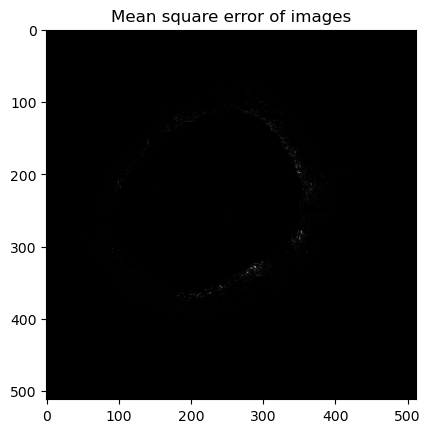

In [14]:
MSE=((dif**2/((sz1[0]*sz2[1]))))
plt.imshow(MSE, cmap='gray',)
plt.title('Mean square error of images')
plt.show()